Sarraj SM
190569J
Feature Engineering Lab

In [1]:
  # Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn.preprocessing import StandardScaler


Lets load csv

In [2]:

# Load our dataset
train = pd.read_csv('/content/drive/MyDrive/ML/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ML/valid.csv')


Clean the data to be more handy in up coming work

In [3]:
labels = ['label_1','label_2','label_3','label_4']
features = [f"feature_{i}" for i in range(1,257)]
train_feature = train.drop(labels, axis=1)
train_label1 = train['label_1']
test_feature = test.drop(labels, axis=1)
test_label1 = test['label_1']




Run Classifier on the above scaled data Frame





In [ ]:
classifier = svm.SVC(kernel="linear")
classifier.fit(train_feature,train_label1)
pred_label1 = classifier.predict(test_feature)

# Evaluate the model
accuracy = accuracy_score(test_label1, pred_label1)
print("Accuracy of label 1 before feature engineering:", accuracy)

Accuracy of label 1 before feature engineering: 0.992


Original Test before feature engineering

In [ ]:
original_test = pd.read_csv('/content/drive/MyDrive/ML/test.csv')
original_test_feature = original_test.drop(labels, axis=1)
pred_label_ori = classifier.predict(original_test_feature)
result_1_df = pd.DataFrame()
result_1_df['Predicted labels before feature engineering'] = pred_label_ori





# 1 - Feature Engineering for label 1












## 1.1 Use correlation co-effiecient






In [ ]:
import numpy as np
corr_matrix1 = train_feature.corr()

# Get upper traingular matrix
upper_1 = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(bool))
features_to_drop_1 = [column for column in upper_1.columns if any(upper_1[column] > 0.4)]

print("No of features to be dropped = ", len(features_to_drop_1))

features_remain = [element for element in train_feature if element not in features_to_drop_1]
print("No of features remaining = ",len(features_remain))



No of features to be dropped =  146
No of features remaining =  110


In [ ]:

classifier = svm.SVC(kernel="linear")
classifier.fit(train[features_remain], train_label1)
valid_predictions = classifier.predict(test[features_remain])
accuracy = accuracy_score(test_label1, valid_predictions)
print("Accuracy after use of correlation co-efficient on L1 :", accuracy)


Accuracy after use of correlation co-efficient on L1 : 0.9813333333333333


## 1.2 Use ANOVA selector

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

new_train_feature_1 = train_feature.drop(features_to_drop_1, axis=1)
new_test_feature_1 = test_feature.drop(features_to_drop_1, axis=1)
k = 77

anova_selector = SelectKBest(score_func=f_classif, k=k)

#use anova selector for top k features
train_feature_selected = anova_selector.fit_transform(new_train_feature_1, train_label1)

# Transform the validation features to select the same 'k' features
valid_feature_selected = anova_selector.transform(new_test_feature_1)

#use svc
classifier = svm.SVC(kernel="linear")
classifier.fit(train_feature_selected, train_label1)
valid_predictions = classifier.predict(valid_feature_selected)
accuracy = accuracy_score(test_label1, valid_predictions)
print("Accuracy after using anova selector :", accuracy)


Accuracy after using anova selector : 0.9706666666666667


Remaing features after using ANOVA selector

In [ ]:
selected_feature_indices = anova_selector.get_support(indices=True)

# Create a DataFrame with the selected features for validation
train_feature_selected_df_1 = pd.DataFrame(train_feature_selected, columns=[features[i] for i in selected_feature_indices])
valid_feature_selected_df_1 = pd.DataFrame(valid_feature_selected, columns=[features[i] for i in selected_feature_indices])
train_feature_selected_df_1.head()
print("Number of rows in the validation features:", valid_feature_selected_df_1.shape[1])



Number of rows in the validation features: 77


## 1.3 Use Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
no_of_components = 70
pca = PCA(n_components=no_of_components)


train_feature_pca_1 = pca.fit_transform(train_feature_selected_df_1)
valid_feature_pca_1 = pca.transform(valid_feature_selected_df_1)


classifier = svm.SVC(kernel="linear")
classifier.fit(train_feature_pca_1, train_label1)
valid_predictions = classifier.predict(valid_feature_pca_1)
accuracy = accuracy_score(test_label1, valid_predictions)
print("Accuracy after PCA :", accuracy)

Accuracy after PCA : 0.9706666666666667


## 1.4 Scaling

In [ ]:
sc=StandardScaler()
scaled_train = sc.fit_transform(train_feature_pca_1)
scaled_test = sc.transform(valid_feature_pca_1)

In [ ]:
classifier = svm.SVC(kernel="linear")
classifier.fit(scaled_train, train_label1)
valid_predictions = classifier.predict(scaled_test)
accuracy = accuracy_score(test_label1, valid_predictions)
print("Accuracy after scaling :", accuracy)

Accuracy after scaling : 0.976


Evaluate after feature engineering

In [ ]:

original_test_feature = original_test.drop(labels, axis=1)
original_test_feature = original_test_feature.drop(features_to_drop_1, axis=1)
original_test_feature_selected = anova_selector.transform(original_test_feature)
original_test_feature_pca = pca.transform(original_test_feature_selected)
scaled_original_test = sc.transform(original_test_feature_pca)


test_pred_label1 = classifier.predict(scaled_original_test)
result_1_df['Predicted labels after feature engineering'] = test_pred_label1
result_1_df['No of new features'] = no_of_components
new_column_names = [f'new_feature_{i+1}' for i in range(scaled_original_test.shape[1])]
pca_df = pd.DataFrame(data=scaled_original_test,columns=new_column_names)
result_1_df = pd.concat([result_1_df, pca_df], axis=1)
result_1_df.head()
result_1_df.to_csv('190569J_label_1.csv',index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


# 2 - Feature Engineering for label 2

for Label 2 Remove the rows with Nan values in both train and validation data

In [ ]:
# Load our dataset
train = pd.read_csv('/content/drive/MyDrive/ML/train.csv')
print("number of Nan values train label 2 :",train['label_2'].isna().sum())
df_train_cleaned_2 = train.dropna()
test = pd.read_csv('/content/drive/MyDrive/ML/valid.csv')
print("number of Nan values test label 2 :",test['label_2'].isna().sum())
df_valid_cleaned_2 = test.dropna()
labels = ['label_1','label_2','label_3','label_4']
features = [f"feature_{i}" for i in range(1,257)]


train_feature_2 = df_train_cleaned_2.drop(labels, axis=1)
train_label2 = df_train_cleaned_2['label_2']
test_feature_2 = df_valid_cleaned_2.drop(labels, axis=1)
test_label2 = df_valid_cleaned_2['label_2']

classifier = svm.SVC(kernel="linear")
classifier.fit(train_feature_2,train_label2)
y_pred = classifier.predict(test_feature_2)
accuracy = accuracy_score(test_label2, y_pred)
print("Accuracy before feature engineering :", accuracy)


number of Nan values train label 2 : 480
number of Nan values test label 2 : 14
Accuracy before feature engineering : 0.9008152173913043


In [ ]:

original_test_feature = original_test.drop(labels, axis=1)
pred_label_ori_2 = classifier.predict(original_test_feature)
result_1_df = pd.DataFrame()
result_1_df['Predicted labels before feature engineering'] = pred_label_ori_2



## 2.1 Use correlation co-effiecient

In [ ]:
import numpy as np
corr_matrix2 = train_feature_2.corr()

# Get upper traingular matrix
upper_2 = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(bool))
features_to_drop_2 = [column for column in upper_2.columns if any(upper_2[column] > 0.5)]

print("No of features to be dropped = ", len(features_to_drop_2))

features_remain_2 = [element for element in train_feature_2 if element not in features_to_drop_2]
print("No of features remaining = ",len(features_remain_2))



No of features to be dropped =  31
No of features remaining =  225


In [ ]:

classifier = svm.SVC(kernel="linear")
classifier.fit(df_train_cleaned_2[features_remain_2], train_label2)
valid_predictions = classifier.predict(df_valid_cleaned_2[features_remain_2])
accuracy = accuracy_score(test_label2, valid_predictions)
print("Accuracy after use of correlation co-efficient on L2 :", accuracy)


Accuracy after use of correlation co-efficient on L2 : 0.8967391304347826


## 2.2 Use ANOVA selector

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

new_train_feature_2 = train_feature_2.drop(features_to_drop_2, axis=1)
new_test_feature_2 = test_feature_2.drop(features_to_drop_2, axis=1)
k = 200

anova_selector = SelectKBest(score_func=f_classif, k=k)

#use anova selector for top k features
train_feature_selected_2 = anova_selector.fit_transform(new_train_feature_2, train_label2)

# Transform the validation features to select the same 'k' features
valid_feature_selected_2 = anova_selector.transform(new_test_feature_2)

#use svc
classifier = svm.SVC(kernel="linear")
classifier.fit(train_feature_selected_2, train_label2)
valid_predictions = classifier.predict(valid_feature_selected_2)
accuracy = accuracy_score(test_label2, valid_predictions)
print("Accuracy after using anova selector :", accuracy)


Accuracy after using anova selector : 0.8831521739130435




Remaing features after using ANOVA selector



In [ ]:
selected_feature_indices = anova_selector.get_support(indices=True)

# Create a DataFrame with the selected features for validation
train_feature_selected_df_2 = pd.DataFrame(train_feature_selected_2, columns=[features[i] for i in selected_feature_indices])
valid_feature_selected_df_2 = pd.DataFrame(valid_feature_selected_2, columns=[features[i] for i in selected_feature_indices])
train_feature_selected_df_2.head()
print("Number of rows in the DataFrame:", valid_feature_selected_df_2.shape[1])



Number of rows in the DataFrame: 200


## 2.3 Use Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
no_of_components = 151
pca = PCA(n_components=no_of_components)


train_feature_pca_2 = pca.fit_transform(train_feature_selected_df_2)
valid_feature_pca_2 = pca.transform(valid_feature_selected_df_2)


classifier = svm.SVC(kernel="linear")
classifier.fit(train_feature_pca_2, train_label2)
valid_predictions = classifier.predict(valid_feature_pca_2)
accuracy = accuracy_score(test_label2, valid_predictions)
print("Accuracy after PCA :", accuracy)

Accuracy after PCA : 0.8668478260869565


## 2.4 Scaling

In [ ]:
sc=StandardScaler()
scaled_train = sc.fit_transform(train_feature_pca_2)
scaled_test = sc.transform(valid_feature_pca_2)

In [ ]:
classifier = svm.SVC(kernel="linear")
classifier.fit(scaled_train, train_label2)
valid_predictions = classifier.predict(scaled_test)
accuracy = accuracy_score(test_label2, valid_predictions)
print("Accuracy after scaling :", accuracy)

Accuracy after scaling : 0.8641304347826086


Evaluate after feature engineering

In [ ]:

original_test_feature = original_test.drop(labels, axis=1)
original_test_feature = original_test_feature.drop(features_to_drop_2, axis=1)
original_test_feature_selected = anova_selector.transform(original_test_feature)
original_test_feature_pca = pca.transform(original_test_feature_selected)
scaled_original_test = sc.transform(original_test_feature_pca)


test_pred_label2 = classifier.predict(scaled_original_test)
result_1_df['Predicted labels after feature engineering'] = test_pred_label2
result_1_df['No of new features'] = no_of_components
new_column_names = [f'new_feature_{i+1}' for i in range(scaled_original_test.shape[1])]
pca_df = pd.DataFrame(data=scaled_original_test,columns=new_column_names)
result_1_df = pd.concat([result_1_df, pca_df], axis=1)
result_1_df.head()
result_1_df.to_csv('190569J_label_2.csv',index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


# 3 - Feature Engineering for label 3

In [ ]:

# Load our dataset
train = pd.read_csv('/content/drive/MyDrive/ML/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ML/valid.csv')
labels = ['label_1','label_2','label_3','label_4']
features = [f"feature_{i}" for i in range(1,257)]


train_feature_3 = train.drop(labels, axis=1)
train_label3 = train['label_3']
test_feature_3 = test.drop(labels, axis=1)
test_label3 = test['label_3']

classifier = svm.SVC(kernel="linear")
classifier.fit(train_feature_3,train_label3)
y_pred = classifier.predict(test_feature_3)
accuracy = accuracy_score(test_label3, y_pred)
print("Accuracy before feature engineering :", accuracy)


Accuracy before feature engineering : 0.9986666666666667


In [ ]:
original_test_feature = original_test.drop(labels, axis=1)
pred_label_ori_3 = classifier.predict(original_test_feature)
result_1_df = pd.DataFrame()
result_1_df['Predicted labels before feature engineering'] = pred_label_ori_3

## 3.1 - Use correlation co-effiecient

In [ ]:
import numpy as np
corr_matrix3 = train_feature_3.corr()

# Get upper traingular matrix
upper_3 = corr_matrix3.where(np.triu(np.ones(corr_matrix3.shape), k=1).astype(bool))
features_to_drop_3 = [column for column in upper_3.columns if any(upper_3[column] > 0.33)]

print("No of features to be dropped = ", len(features_to_drop_3))

features_remain_3 = [element for element in train_feature_3 if element not in features_to_drop_3]
print("No of features remaining = ",len(features_remain_3))



No of features to be dropped =  212
No of features remaining =  44


In [ ]:

classifier = svm.SVC(kernel="linear")
classifier.fit(train[features_remain_3], train_label3)
valid_predictions = classifier.predict(test[features_remain_3])
accuracy = accuracy_score(test_label3, valid_predictions)
print("Accuracy after use of correlation co-efficient on L3 :", accuracy)


Accuracy after use of correlation co-efficient on L3 : 0.9906666666666667


## 3.2 Use ANOVA selector

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

new_train_feature_3 = train_feature_3.drop(features_to_drop_3, axis=1)
new_test_feature_3 = test_feature_3.drop(features_to_drop_3, axis=1)
k = 21

anova_selector = SelectKBest(score_func=f_classif, k=k)

#use anova selector for top k features
train_feature_selected_3 = anova_selector.fit_transform(new_train_feature_3, train_label3)

# Transform the validation features to select the same 'k' features
valid_feature_selected_3 = anova_selector.transform(new_test_feature_3)

#use svc
classifier = svm.SVC(kernel="linear")
classifier.fit(train_feature_selected_3, train_label3)
valid_predictions = classifier.predict(valid_feature_selected_3)
accuracy = accuracy_score(test_label3, valid_predictions)
print("Accuracy after using anova selector :", accuracy)


Accuracy after using anova selector : 0.9786666666666667




Remaing features after using ANOVA selector



In [ ]:
selected_feature_indices = anova_selector.get_support(indices=True)

# Create a DataFrame with the selected features for validation
train_feature_selected_df_3 = pd.DataFrame(train_feature_selected_3, columns=[features[i] for i in selected_feature_indices])
valid_feature_selected_df_3 = pd.DataFrame(valid_feature_selected_3, columns=[features[i] for i in selected_feature_indices])
train_feature_selected_df_3.head()
print("Number of rows in the DataFrame:", valid_feature_selected_df_3.shape[1])



Number of rows in the DataFrame: 21


## 3.3 Use Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
no_of_components = 16
pca = PCA(n_components=no_of_components)


train_feature_pca_3 = pca.fit_transform(train_feature_selected_df_3)
valid_feature_pca_3 = pca.transform(valid_feature_selected_df_3)


classifier = svm.SVC(kernel="linear")
classifier.fit(train_feature_pca_3, train_label3)
valid_predictions = classifier.predict(valid_feature_pca_3)
accuracy = accuracy_score(test_label3, valid_predictions)
print("Accuracy after PCA :", accuracy)

Accuracy after PCA : 0.98


## 3.4 Scaling

In [ ]:
sc=StandardScaler()
scaled_train = sc.fit_transform(train_feature_pca_3)
scaled_test = sc.transform(valid_feature_pca_3)

In [ ]:
classifier = svm.SVC(kernel="linear")
classifier.fit(scaled_train, train_label3)
valid_predictions = classifier.predict(scaled_test)
accuracy = accuracy_score(test_label3, valid_predictions)
print("Accuracy after scaling :", accuracy)

Accuracy after scaling : 0.98


In [ ]:

original_test_feature = original_test.drop(labels, axis=1)
original_test_feature = original_test_feature.drop(features_to_drop_3, axis=1)
original_test_feature_selected = anova_selector.transform(original_test_feature)
original_test_feature_pca = pca.transform(original_test_feature_selected)
scaled_original_test = sc.transform(original_test_feature_pca)


test_pred_label3 = classifier.predict(scaled_original_test)
result_1_df['Predicted labels after feature engineering'] = test_pred_label3
result_1_df['No of new features'] = no_of_components
new_column_names = [f'new_feature_{i+1}' for i in range(scaled_original_test.shape[1])]
pca_df = pd.DataFrame(data=scaled_original_test,columns=new_column_names)
result_1_df = pd.concat([result_1_df, pca_df], axis=1)
result_1_df.head()
result_1_df.to_csv('190569J_label_3.csv',index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


# 4 - Feature Engineering for label 4

In [ ]:

# Load our dataset
train = pd.read_csv('/content/drive/MyDrive/ML/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ML/valid.csv')
labels = ['label_1','label_2','label_3','label_4']
features = [f"feature_{i}" for i in range(1,257)]


train_feature_4 = train.drop(labels, axis=1)
train_label4 = train['label_4']
test_feature_4 = test.drop(labels, axis=1)
test_label4 = test['label_4']

classifier = svm.SVC(kernel="linear")
classifier.fit(train_feature_4,train_label4)
y_pred = classifier.predict(test_feature_4)
accuracy = accuracy_score(test_label4, y_pred)
print("Accuracy before feature engineering :", accuracy)


Accuracy before feature engineering : 0.9586666666666667


test file prediction

In [ ]:
original_test = pd.read_csv('/content/drive/MyDrive/ML/test.csv')
original_test_feature = original_test.drop(labels, axis=1)
pred_label_ori_4 = classifier.predict(original_test_feature)
result_1_df = pd.DataFrame()
result_1_df['Predicted labels before feature engineering'] = pred_label_ori_4



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

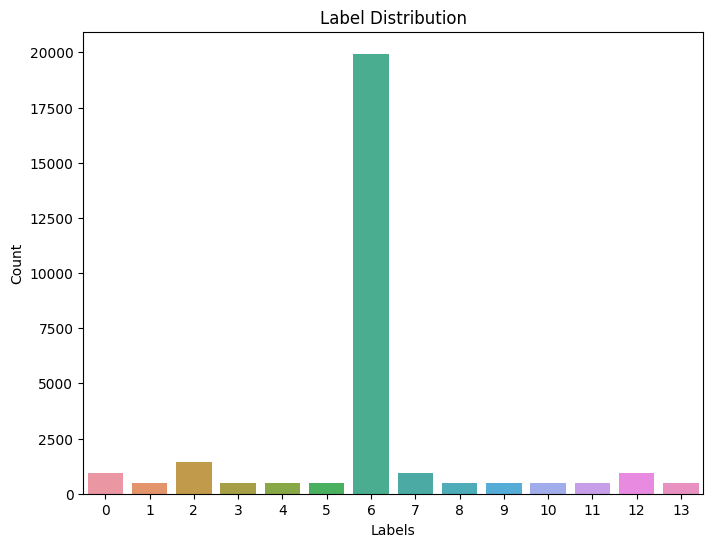

In [ ]:

# Create a countplot to visualize label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=train_label4,data=train)
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
#oversample minority class
smote = SMOTE(random_state=42)
feature_resampled, label_resampled = smote.fit_resample(train_feature_4, train_label4)

classifier = svm.SVC(kernel="linear")
classifier.fit(feature_resampled,label_resampled)
y_pred = classifier.predict(test_feature_4)
accuracy = accuracy_score(test_label4, y_pred)
print("Accuracy after oversampling :", accuracy)

Accuracy after oversampling : 0.9573333333333334


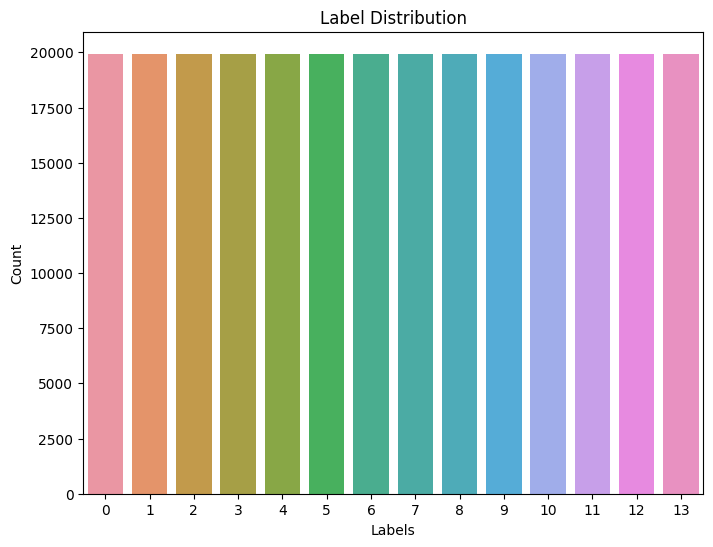

In [ ]:

# Create a countplot to visualize label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=label_resampled,data=feature_resampled)
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

## 4.1 - Use correlation co-effiecient

In [ ]:
import numpy as np
corr_matrix4 = train_feature_4.corr()

# Get upper traingular matrix
upper_4 = corr_matrix4.where(np.triu(np.ones(corr_matrix4.shape), k=1).astype(bool))
features_to_drop_4 = [column for column in upper_4.columns if any(upper_4[column] > 0.44)]

print("No of features to be dropped = ", len(features_to_drop_4))

features_remain_4 = [element for element in train_feature_4 if element not in features_to_drop_4]
print("No of features remaining = ",len(features_remain_4))



No of features to be dropped =  95
No of features remaining =  161


In [ ]:

classifier = svm.SVC(kernel="linear")
classifier.fit(train[features_remain_4], train_label4)
valid_predictions = classifier.predict(test[features_remain_4])
accuracy = accuracy_score(test_label4, valid_predictions)
print("Accuracy after use of correlation co-efficient on L4 :", accuracy)


Accuracy after use of correlation co-efficient on L4 : 0.9506666666666667


## 4.2 Use ANOVA selector

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

new_train_feature_4 = train_feature_4.drop(features_to_drop_4, axis=1)
new_test_feature_4 = test_feature_4.drop(features_to_drop_4, axis=1)
k = 110

anova_selector = SelectKBest(score_func=f_classif, k=k)

#use anova selector for top k features
train_feature_selected_4 = anova_selector.fit_transform(new_train_feature_4, train_label4)

# Transform the validation features to select the same 'k' features
valid_feature_selected_4 = anova_selector.transform(new_test_feature_4)

#use svc
classifier = svm.SVC(kernel="linear")
classifier.fit(train_feature_selected_4, train_label4)
valid_predictions = classifier.predict(valid_feature_selected_4)
accuracy = accuracy_score(test_label4, valid_predictions)
print("Accuracy after using anova selector :", accuracy)


Accuracy after using anova selector : 0.9333333333333333




Remaing features after using ANOVA selector



In [ ]:
selected_feature_indices = anova_selector.get_support(indices=True)

# Create a DataFrame with the selected features for validation
train_feature_selected_df_4 = pd.DataFrame(train_feature_selected_4, columns=[features[i] for i in selected_feature_indices])
valid_feature_selected_df_4 = pd.DataFrame(valid_feature_selected_4, columns=[features[i] for i in selected_feature_indices])
train_feature_selected_df_4.head()
print("Number of columns in the features:", valid_feature_selected_df_4.shape[1])



Number of columns in the features: 110


## 4.3 Use Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
no_of_components = 99
pca = PCA(n_components=no_of_components)


train_feature_pca_4 = pca.fit_transform(train_feature_selected_df_4)
valid_feature_pca_4 = pca.transform(valid_feature_selected_df_4)


classifier = svm.SVC(kernel="linear")
classifier.fit(train_feature_pca_4, train_label4)
valid_predictions = classifier.predict(valid_feature_pca_4)
accuracy = accuracy_score(test_label4, valid_predictions)
print("Accuracy after PCA :", accuracy)

Accuracy after PCA : 0.9306666666666666


## 4.4 Scaling

In [ ]:
sc=StandardScaler()
scaled_train = sc.fit_transform(train_feature_pca_4)
scaled_test = sc.transform(valid_feature_pca_4)

In [ ]:
classifier = svm.SVC(kernel="linear")
classifier.fit(scaled_train, train_label4)
valid_predictions = classifier.predict(scaled_test)
accuracy = accuracy_score(test_label4, valid_predictions)
print("Accuracy after scaling :", accuracy)

Accuracy after scaling : 0.9306666666666666


In [ ]:
original_test_feature = original_test.drop(labels, axis=1)
original_test_feature = original_test_feature.drop(features_to_drop_4, axis=1)
original_test_feature_selected = anova_selector.transform(original_test_feature)
original_test_feature_pca = pca.transform(original_test_feature_selected)
scaled_original_test = sc.transform(original_test_feature_pca)


test_pred_label4 = classifier.predict(scaled_original_test)
result_1_df['Predicted labels after feature engineering'] = test_pred_label4
result_1_df['No of new features'] = no_of_components
new_column_names = [f'new_feature_{i+1}' for i in range(scaled_original_test.shape[1])]
pca_df = pd.DataFrame(data=scaled_original_test,columns=new_column_names)
result_1_df = pd.concat([result_1_df, pca_df], axis=1)
result_1_df.head()
result_1_df.to_csv('190569J_label_4.csv',index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
